In [130]:
import numpy as np
from scipy.spatial.distance import cdist
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt
import math

In [91]:
X = np.array([[1,2,3],[4,5,6]])
dist=cdist(X,X)
d2 =np.square(dist)
J =  np.eye(2) - np.ones(2)/2
B = -1/2 *J@d2@J
np.linalg.eig(B)

(array([13.5,  0. ]), array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [95]:
otudf = pd.read_csv(filepath_or_buffer="/home/spanashis/Documents/Stats/Project/amazon-rivers/otudf",index_col=0)
odist = cdist(otudf,otudf)
d2 =np.square(odist)
J =  np.eye(164) - np.ones(164)/164
B = -1/2 *J@d2@J
np.linalg.eig(B)

(array([3.84587043e+10, 3.08319985e+10, 1.87450542e+10, 1.37626921e+10,
        7.12829700e+09, 4.78921001e+09, 4.23387364e+09, 3.63533855e+09,
        3.29430587e+09, 2.66952865e+09, 2.00443012e+09, 1.82305536e+09,
        1.62147882e+09, 1.52244136e+09, 1.22887985e+09, 9.53095329e+08,
        8.10111934e+08, 6.68227260e+08, 5.46412985e+08, 4.82846695e+08,
        4.66237463e+08, 3.94823747e+08, 3.64481610e+08, 3.17506408e+08,
        3.03085689e+08, 2.43188332e+08, 2.21188733e+08, 1.95689603e+08,
        1.90943949e+08, 1.75822791e+08, 1.84130370e+08, 1.37035383e+08,
        1.30888449e+08, 1.26787355e+08, 1.09392868e+08, 1.04166480e+08,
        9.27094962e+07, 9.02558576e+07, 8.08048659e+07, 7.58058692e+07,
        7.36274745e+07, 7.11432227e+07, 6.88088305e+07, 6.50217349e+07,
        6.25216277e+07, 5.91093738e+07, 5.64012500e+07, 5.39713693e+07,
        5.15354444e+07, 5.04285897e+07, 4.77898938e+07, 4.63759122e+07,
        4.50444492e+07, 4.22456495e+07, 4.02608426e+07, 3.784352

In [88]:
B

array([[ 6.75, -6.75],
       [-6.75,  6.75]])

In [90]:
J@X@X.T@J

array([[ 6.75, -6.75],
       [-6.75,  6.75]])

In [100]:
# PCA
Xcent = X -X.mean(0)
print(np.cov(X.T))
Xcent@Xcent.T

[[4.5 4.5 4.5]
 [4.5 4.5 4.5]
 [4.5 4.5 4.5]]


array([[ 6.75, -6.75],
       [-6.75,  6.75]])

In [115]:
def PCA(M,faces):
    avface =(np.mean(faces,axis=0))
    
    cdm = faces - avface
    
    covma = cdm@cdm.T

    eigval ,eigvec= np.linalg.eig(covma)
    #choosing M eigenectors and transforming them back to the pixelspace creating the weights
    W =np.concatenate([np.dot(cdm.T,eigvec[:,[i]])/np.linalg.norm(np.dot(cdm.T,eigvec[:,[i]])) for i in range(M)],axis = 1)
    Y = cdm@W
    #return(np.matmul(W,Y.T))
    return(Y)

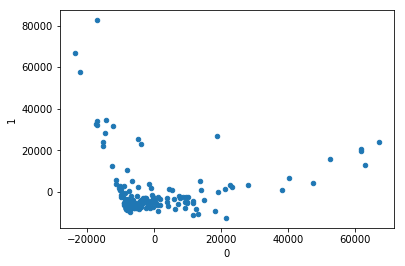

In [127]:
# PCA
# Xcent = otudf -otudf.mean(0)
# cov = Xcent.T@Xcent/164
# np.linalg.eig(cov)
pcao = PCA(2,otudf)
pcao.plot.scatter(0,1)

In [59]:
def PCoA(M,faces):
    odist = cdist(otudf,otudf)
    d2 =np.square(odist)
    J =  np.eye(164) - np.ones(164)/164
    B = -1/2 *J@d2@J
    
    

    eigval ,eigvec= np.linalg.eig(B)
    #choosing M eigenectors and transforming them back to the pixelspace creating the weights
    W =np.concatenate([np.dot(cdm.T,eigvec[:,[i]])/np.linalg.norm(np.dot(cdm.T,eigvec[:,[i]])) for i in range(M)],axis = 1)
    Y = cdm@W
    #return(np.matmul(W,Y.T))
    return(Y)

array([[-5., -5.],
       [ 5.,  5.]])